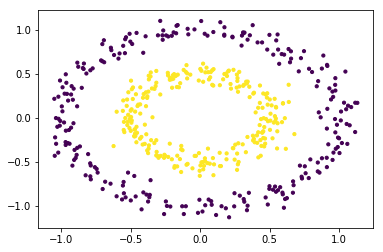

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

noisy_circles, noisy_circles_labels  = datasets.make_circles(n_samples=500, factor=.5,
                                      noise=.07)
#print(noisy_circles)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], s=10, c=noisy_circles_labels)

plt.show()

In [7]:
from sklearn.svm import SVC

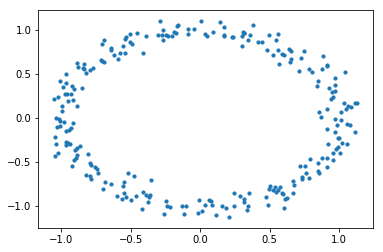

In [8]:
zero_class = np.where(noisy_circles_labels==0)[0]
first_class = np.where(noisy_circles_labels==1)[0]
X_train = noisy_circles[zero_class]
Y_train = noisy_circles[first_class]
plt.scatter(X_train[:, 0], X_train[:, 1], s=10)

plt.show()

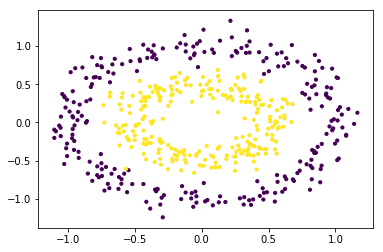

In [14]:
noisy_circles_test, noisy_circles_test_labels  = datasets.make_circles(n_samples=500, factor=.5,
                                      noise=.1)
#print(noisy_circles)
plt.scatter(noisy_circles_test[:, 0], noisy_circles_test[:, 1], s=10, c=noisy_circles_test_labels)

plt.show()

accuracy 0.992


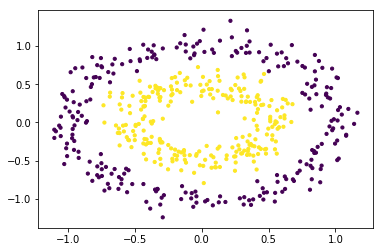

accuracy 0.984


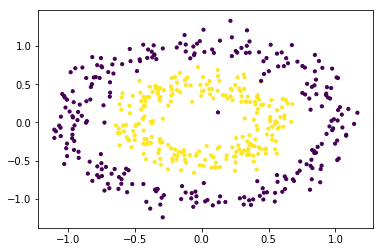

accuracy 0.98


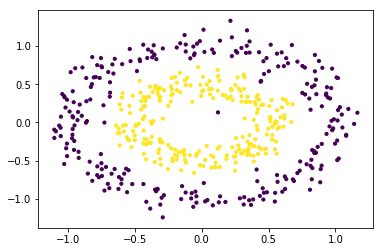

In [20]:
import sklearn
for g in np.linspace(0.1, 100, 3):
    clf = SVC(gamma=g, kernel = 'rbf').fit(noisy_circles, noisy_circles_labels)
    predicted_labels = clf.predict(noisy_circles_test)
    plt.scatter(noisy_circles_test[:, 0], noisy_circles_test[:, 1], s=10, c=predicted_labels)
    print("accuracy", sklearn.metrics.accuracy_score(noisy_circles_test_labels, predicted_labels))
    
    plt.show()

## Conclusions: 

- we train on outer cicle (X_train), then we sample other 2 circles with slightly different noise ratio - (X for inliers, Y for outliers) 
- two classes: outer circle, outliers: inner circle
- recognises the data it was trained on perfectly
- let's use cross validation on this toy data
- also we can see, that cover on the inliers is not as tight as in OCSVM - the points from the circle with slightly bigger radius (that are generated with slightly bigger noise, a bit outside of the outer circle) are not considered as outliers; it captures structure well enough to see, that point in the middle of the circle might be belonging to the outer circle class (for greater gamma)

## Cite

#### Bibtex:
@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

## Cross Validation

- #### we are going to cross validate on few parameters: kernel type, gaussian width and regularization parameter
- #### then we print the accuracy of the prediction based on the best parameter 


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv = 3)
clf.fit(noisy_circles, noisy_circles_labels)
#print(clf.best_estimator_)
print("Best params ", clf.best_params_)
#print(clf.cv_results_['gamma'], clf.cv_results_['mean_test_score'])
predicted_best_param = clf.predict(noisy_circles_test)
print("accuracy", sklearn.metrics.accuracy_score(noisy_circles_test_labels, predicted_best_param))
    

Best params  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy 0.994
